In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.dropna(inplace=True)
data.head()

,CustomerID,Genre,Age,Income(k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


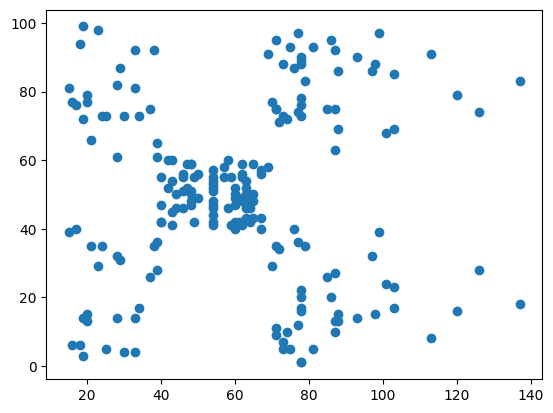

In [4]:
plt.scatter(data["Income(k$)"], data["Spending Score"])

In [5]:
scaler = StandardScaler()
data["Scaled Income"] = scaler.fit_transform(data[["Income(k$)"]])
data["Scaled Spending Score"] = scaler.fit_transform(data[["Spending Score"]])
data.head()

,CustomerID,Genre,Age,Income(k$),Spending Score,Scaled Income,Scaled Spending Score
0,1,Male,19,15,39,-1.738999,-0.434801
1,2,Male,21,15,81,-1.738999,1.195704
2,3,Female,20,16,6,-1.700830,-1.715913
3,4,Female,23,16,77,-1.700830,1.040418
4,5,Female,31,17,40,-1.662660,-0.395980


In [6]:
k = range(1,10)
sse = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(data[["Scaled Income", "Scaled Spending Score"]])
    sse.append(kmeans.inertia_)

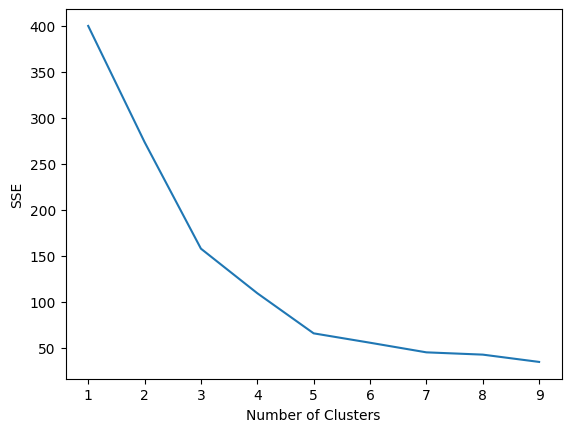

In [7]:
plt.plot(k, sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [8]:
k=5 #elbow method
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(data[["Scaled Income", "Scaled Spending Score"]])
predicted = kmeans.predict(data[["Scaled Income", "Scaled Spending Score"]])

In [9]:
data["Cluster"] = predicted
data.head()

,CustomerID,Genre,Age,Income(k$),Spending Score,Scaled Income,Scaled Spending Score,Cluster
0,1,Male,19,15,39,-1.738999,-0.434801,4
1,2,Male,21,15,81,-1.738999,1.195704,2
2,3,Female,20,16,6,-1.700830,-1.715913,4
3,4,Female,23,16,77,-1.700830,1.040418,2
4,5,Female,31,17,40,-1.662660,-0.395980,4


In [17]:
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)

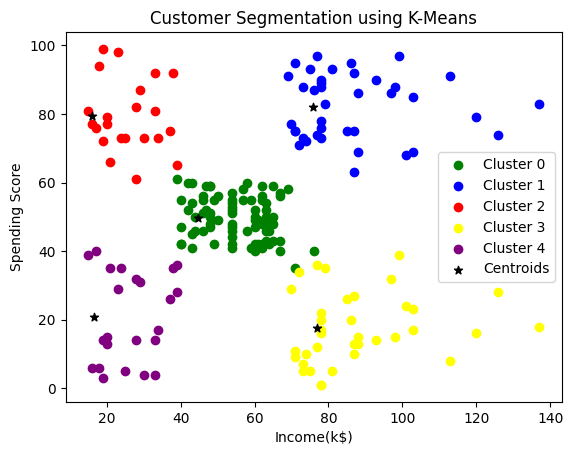

In [19]:
plt.scatter(data[data.Cluster == 0]["Income(k$)"], data[data.Cluster == 0]["Spending Score"], 
            color="green", label="Cluster 0")
plt.scatter(data[data.Cluster == 1]["Income(k$)"], data[data.Cluster == 1]["Spending Score"], 
            color="blue", label="Cluster 1")
plt.scatter(data[data.Cluster == 2]["Income(k$)"], data[data.Cluster == 2]["Spending Score"], 
            color="red", label="Cluster 2")
plt.scatter(data[data.Cluster == 3]["Income(k$)"], data[data.Cluster == 3]["Spending Score"], 
            color="yellow", label="Cluster 3")
plt.scatter(data[data.Cluster == 4]["Income(k$)"], data[data.Cluster == 4]["Spending Score"], 
            color="purple", label="Cluster 4")

plt.scatter(original_centers[:,0], original_centers[:,1], color="black", marker = "*", label="Centroids")
plt.xlabel("Income(k$)")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Customer Segmentation using K-Means")
plt.show()

